In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
texts = ['you are the best',
         'you are the nice']

tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

In [3]:
sequences = tokenizer.texts_to_sequences(texts)

In [4]:
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

In [5]:
print(tokenizer.word_index)
print('------------------------')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
------------------------


In [6]:
print(f'sequences: {sequences}\n')
print(f'binary_vectors: \n {binary_results}\n')

sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors: 
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]



In [7]:
test_text = ['You are the One']

In [8]:
test_seq = tokenizer.texts_to_sequences(test_text)

In [9]:
print(f'test sequences: {test_seq}')

test sequences: [[2, 3, 4, 1]]


In [10]:
#####################토큰화####################

In [11]:
from tensorflow.keras.datasets import imdb

In [12]:
num_words = 10000

In [13]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [17]:
print(x_train[0])
print('----------------------------------------------------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
----------------------------------------------------
1


In [20]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key

for i in range(1, 4):
    print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
max_len = 500

In [23]:
print('Before pad_sequences: ', len(x_train[0]))

Before pad_sequences:  218


In [24]:
pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_x_train[0]))

After pad_sequences:  500


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])


In [29]:
history = model.fit(pad_x_train, y_train,
                    batch_size = 32,
                    epochs = 30,
                    validation_split = 0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - acc: 0.6609 - loss: 0.5965 - val_acc: 0.8470 - val_loss: 0.3420
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.9186 - loss: 0.2178 - val_acc: 0.8770 - val_loss: 0.2945
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9694 - loss: 0.1153 - val_acc: 0.8670 - val_loss: 0.3179
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.9901 - loss: 0.0555 - val_acc: 0.8740 - val_loss: 0.3307
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9969 - loss: 0.0260 - val_acc: 0.8710 - val_loss: 0.3573
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.9989 - loss: 0.0146 - val_acc: 0.8682 - val_loss: 0.3945
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9998 - loss: 0.0068 - val_acc: 0.8686 - val_loss: 0.4080
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 1.0000 - loss: 0.0041 - val_acc: 0.8682 - val_loss: 0.4279
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/s

In [31]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8500 - loss: 0.7914


[0.7968581318855286, 0.8503999710083008]

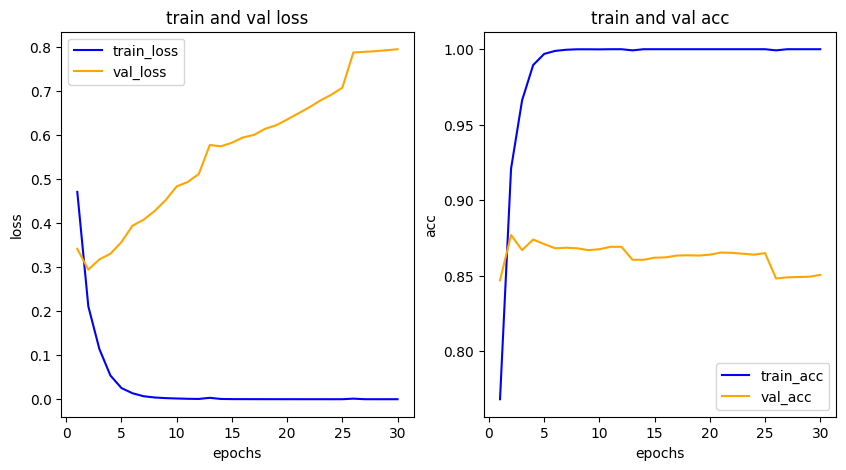

In [32]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()